# Time Series

# Introduction to Time series

* A time series is a sequence taken at successive equally spaced points in time. Thus it is a sequence of discrete-time data. 

* A time series is a sequence of numerical data points in successive order.

* A time series tracks the movement of the chosen data points, over a specified period of time with data points recorded at regular intervals. 

* There is no minimum or maximum amount of time that must be included

eg - Economic Forecasting , Sales Forecasting , Budgetary Analysis , Stock Market Analysis , Yield Projections , Census Analysis

# Time Series Forecasting

* Time series forecasting is the use of a model to predict future values based on previously observed values. Most often, this relates to trend analysis, cyclical fluctuation analysis and issues of seasonality.



# Components of Time Series
* Trend

* Seasonality

* Irregularity

* Cyclic

## Trend
* A movement relatively higher or lower values over a long period of time,when the series analysis  show a pattern that is upward or downward we call it upterend and downterend respectively.

* If there is no Trend we call it horizontal trend or stationary trend

* Trend is something that happens for time and then disappears.

## Seasonality
Seasonality is a characteristic of a time series in which the data experiences regular and predictable changes that recur every calendar year. Any predictable fluctuation or pattern that recurs or repeats over a one-year period is said to be seasonal.


Seasonal effects are different from cyclical effects, as seasonal cycles are observed within one calendar year, while cyclical effects, such as boosted sales due to low unemployment rates, can span time periods shorter or longer than one calendar year.

## Irregularity
* It is also called noise or residual

* These are unpredictabe in nature or unsystematic , they happen for short duration and are non repeating.

eg- buying of medicine due to flood goes up , but when flood goes ,the sales of medicines come down , in this we don't know how much sale is going to happen.

## Cyclic
cycles are observed within one calendar year, while cyclical effects, such as boosted sales due to low unemployment rates, can span time periods shorter or longer than one calendar year.


### Time series can not be used 
* when the values are constant. ef - sale of coffee is same every day for every month.

* values are in form of functions - sin(x) or cos(x) , we can just get the values by putting them in function.

## Stationarity 
For applying any kind of model on time series data . The data should be stationary.

For data to be stationary -

* It should have a constant mean according to time.

* It should have constan variance i.e variance should be equal at equal intervals of time.


**Time Series analysis have 4 phases:**

* Load data

* check stationarity

* Make series stationary

* Buid model

## in Anaconda Prompt ------   pip install import_ipynb


- This will allow to import other ipynb file

In [1]:
 !pip install import_ipynb

In [2]:
import import_ipynb
import Module_making

importing Jupyter notebook from Module_making.ipynb


In [3]:
import pandas as pd          
import numpy as np          # For mathematical calculations 
import matplotlib.pyplot as plt  # For plotting graphs    
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

from statsmodels.tsa.arima_model import ARIMA, ARMA
from statsmodels.tsa.ar_model import AR

In [4]:
df = pd.read_csv('AirPassengers.csv')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   TravelDate  144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB
None


,TravelDate,Passengers
0,01-01-1949,112
1,02-01-1949,118
2,03-01-1949,132
3,04-01-1949,129
4,05-01-1949,121


In [5]:
df['TravelDate'] = pd.to_datetime(df['TravelDate'])

print(df.info())

indexed_df = df.set_index('TravelDate')
indexed_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   TravelDate  144 non-null    datetime64[ns]
 1   Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB
None


,Passengers
TravelDate,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


### To check stationarity we have 2 popular tests - 
* **Rolling statistics** - Here we plot the moving average or moving variance and see if it varies with time.


* **Augumented Dikley Fuler Test (ADF Test)** - IT HAS A NULL HYPOTHESIS - That the time series is not stationary  , the result comparises of Test statistic and some critical values for different confidence level.

p value should be less than 0.5

if test statistic < critical value , we can reject the null hypothesis and say that the series is stationary.

**Using Another IPYNB file as a Module here and using Function TS defined in that module to check stationarity**

p-value                       0.99188
lags-used                    13.00000
no. of observations used    130.00000
dtype: float64


'p > 0.05 - Accept the Null Hypothesis '

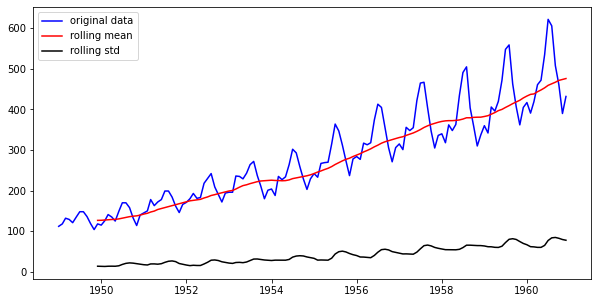

In [6]:
Module_making.ts(indexed_df.Passengers)

''' P Value < 0.05 '''
# so we Accept the Null Hypothesis, thus Time Series is Not Stationary
'''p > 0.05 - Accept the Null Hypothesis '''

## Making Time Series Stationary
There are 2 major reasons behind non-stationaruty of a TS:

1. __Trend__ – varying mean over time. For eg, in this case we saw that on average, the number of passengers was growing over time.
2. __Seasonality__ – variations at specific time-frames. eg people might have a tendency to buy cars in a particular month because of pay increment or festivals.

### Transformations
- These can be taking a LOG or DIFFERENCE the data

## Taking LOG of these values

In [7]:
indexed_df.head()

,Passengers
TravelDate,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [8]:
# estimate trend , we take lOG of the original data , it changes the values on y
indexed_df_log = np.log(indexed_df)
print(indexed_df_log.head())

            Passengers
TravelDate            
1949-01-01    4.718499
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791


## Checking Stationarity

p-value                       0.422367
lags-used                    13.000000
no. of observations used    130.000000
dtype: float64


'if p < 0.05 - stationarity achieved'

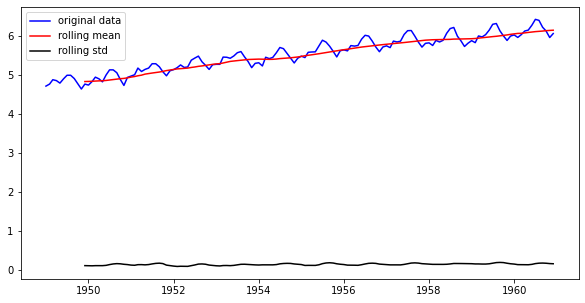

In [9]:
Module_making.ts(indexed_df_log.Passengers) 

'''if p < 0.05 - stationarity achieved'''

## Differencing - 2nd method to remove stationarity

#### .shift() = Shifts index by desired number of periods with an optional time freq.

By it we can see the percentage change or change in number of passengers in a month.

The following command shifts the passengers forward by 1 month.
- Differencing is performed by subtracting the previous observation from the current observation.

In [10]:
indexed_df.head()

,Passengers
TravelDate,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [11]:
# mn = indexed_df.copy()
# mn['shift 1'] = indexed_df.shift(periods = 2)
# mn['order1'] = mn['Passengers']- mn['shift 1']
# mn.head(8)

In [12]:
# indexed_df.shift(periods = 1).head()

In [13]:
indexed_df_shiffting = indexed_df - indexed_df.shift(periods = 2)

print(indexed_df_shiffting.head())
indexed_df_shiffting.dropna(inplace = True)

            Passengers
TravelDate            
1949-01-01         NaN
1949-02-01         NaN
1949-03-01        20.0
1949-04-01        11.0
1949-05-01       -11.0


p-value                       0.03863
lags-used                    11.00000
no. of observations used    130.00000
dtype: float64


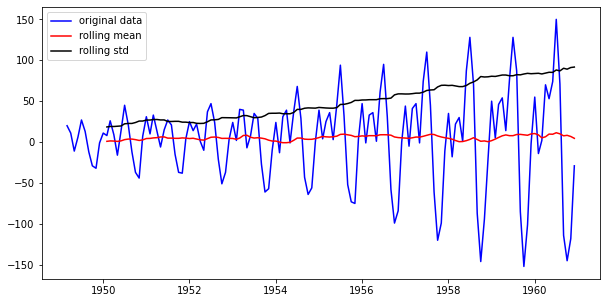

In [14]:
# Checking Stationarity
Module_making.ts(indexed_df_shiffting.Passengers)

## ACF & PACF Graphs

- Autocorrelation function (ACF) and Partial autocorrelation (PACF) 
- ACF describes the autocorrelation between an observation and another observation at a prior time step that includes direct and indirect dependence information.
- A lag 1 autocorrelation (i.e., k = 1 in the above) is the correlation between values that are one time period apart. More generally, a lag k autocorrelation is the correlation between values that are k time periods apart.
- The ACF is a way to measure the linear relationship between an observation at time t and the observations at previous times
- ACF Graph is used to check the Value to be taken for MA model
- The PACF is most useful for identifying the order of an autoregressive model. 
- PACF graph is used to check the Value to be taken for AR model

## ARIMA
* ARIMA models (which include ARMA, AR and MA models) are a general class of models to forecast stationary time series. ARIMA models are made of three parts:


    - A weighted sum of lagged values of the series (Auto-regressive (AR) part) - p
    - A weighted sum of lagged forecasted errors of the series (Moving-average (MA) part) -q
    - A difference of the time series (Integrated (I) part)-i
    
    
* An ARIMA model is often noted ARIMA(p, d, q) where p represents the order of the AR part, d the order of differencing (“I” part), and q the order of the MA term.

## Feeding Data without taking log and Differencing thus without making it Stationary

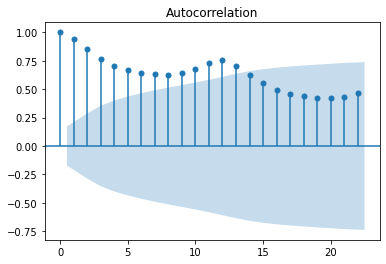

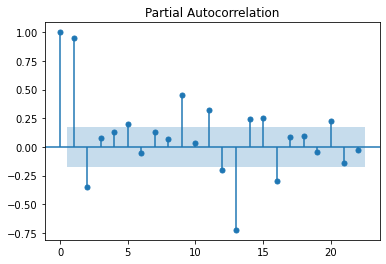

In [15]:
x2 = indexed_df[:130] # train data
y2 = indexed_df[130:] # test data

Module_making.acf_pacf_plots(x2)

# PACF - AR - AR Model - only value for p
# ACF -  MA - MA Model - only value for q

# X-Axis has Lag Values & Y-Axis has autocorelation score

In [16]:
y2.index[-1]

Timestamp('1960-12-01 00:00:00')

In [17]:
# ARIMA model
model  = ARIMA(x2, order = (8,0,1))  # (p , d(differenced) , q) values , we can use different values to make model good or worse
results_ar_2 = model.fit()
#10,1,0 - 5
#8,0,1 - 10


In [18]:
pred_2 = results_ar_2.predict(start = y2.index[0], end = y2.index[-1])

In [19]:
pred_2.head()

1959-11-01    374.123717
1959-12-01    368.948849
1960-01-01    382.775397
1960-02-01    375.521996
1960-03-01    377.563786
Freq: MS, dtype: float64

,Mean_Absolute_Error,Mean_Squared_Error,Mean_Absolute_Percentage_Error,Root_Mean_Sqared_Error
Values,52.740385,4473.131564,10.455494,66.881474


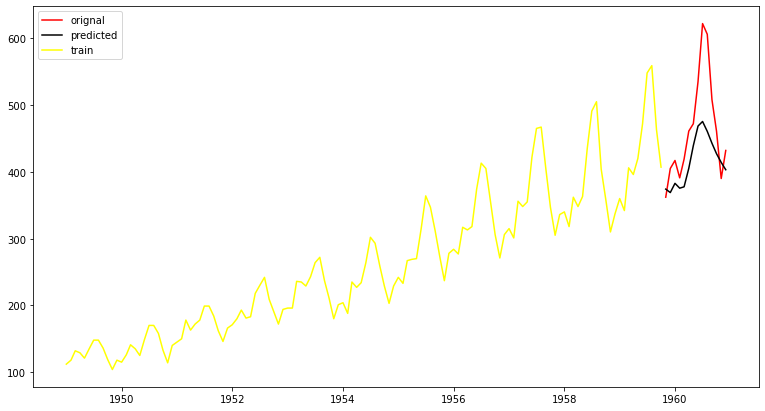

In [20]:
df_pred_2 = pd.DataFrame({'Actual': y2.Passengers, 'Predicted':pred_2})

fig = plt.figure(figsize=(13,7))

plt.plot(df_pred_2['Actual'],color = 'red', label = 'orignal')

plt.plot(df_pred_2['Predicted'],color = 'black',label = 'predicted')

plt.plot(x2['Passengers'], color = 'yellow', label = 'train')

plt.legend();

# To check results
Module_making.evaluate_forecast(y2.Passengers, pred_2)

In [21]:
forecast = results_ar_2.forecast(steps = 3)

print(' # Forecasted Value: ', forecast[0].astype(int)) # Forecasted Value
print('\n # Standard Error: ',forecast[1].astype(int)) # Standard Error
print('\n Confidence Interval: ', forecast[2].astype(int)) # Confidence Interval

 # Forecasted Value:  [374 368 382]

 # Standard Error:  [24 37 43]

 Confidence Interval:  [[325 422]
 [295 442]
 [297 467]]


### Making pickle

In [22]:
# df_pred

In [23]:
# import pickle
# # saved the trained model in file with given name
# pickle_out = open("random forest model.pickle","wb")
# pickle.dump(model, pickle_out)
# pickle_out.close()

In [24]:
# loading the pickeled model
# pickle_in = open("random forest model.pickle","rb")
# trained_model = pickle.load(pickle_in)

In [25]:
# trained_model.forecast(5)[0]